In [2]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numpy.linalg import norm
from random import choices
from scipy.stats import mode
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import MiniBatchKMeans

## Cover Area Default

In [2]:
folders = [
    "heart_rate",
    "labels",
    "motion",
    "steps"
]

def get_freq(df):
    time_idx = df.time
    mean_sample_interval = time_idx.rolling(2).aggregate(lambda ts: ts.values[1] - ts.values[0]).mean()
    return 1/mean_sample_interval

def plot_results(ts, time_idx, snippets, area, fractions, curve, subseq_size, plot_curve=False, log_scale=False, save_path=None, comp_time='0'):
    time_idx = time_idx / 3600
    k = len(snippets)
    if plot_curve:
        plt.figure(figsize=(20, 5))
        plt.plot(curve)
        plt.title(f"Curve found using m={subseq_size} and k={k} with area {np.format_float_scientific(area, precision=2)}")
        if log_scale:
            plt.yscale('log')

    y_lim = (ts.min(), ts.max())
    margin = int(subseq_size / 2)
    plt.figure(figsize=(15, k * 2))

    for i, (s, fraction) in enumerate(zip(snippets, fractions)):
        plt.subplot(k, 1, i + 1)
        snippet = ts[s:s+subseq_size]
        tss = ts[s-margin:s+subseq_size+margin]
        plt.plot(time_idx[s-margin:s+subseq_size+margin], tss)
        plt.plot(time_idx[s:s+subseq_size], snippet, 'r')
        plt.xlabel("Time (h)")
        plt.title(f"Responsible for {np.round(fraction*100, 2)}% of the series")

        if log_scale:
            plt.yscale('log')

        plt.ylim(y_lim)
    plt.figtext(0.5, 0.01, f"Computation Time: {comp_time}s", ha="center", fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

def find_snippets(df, series_col, k=3):
    freq = get_freq(df)
    subseq_size = 15
    print(f"Computing {k} snippets for signal with freq: {np.round(freq, 2)}Hz using subsequency size: {subseq_size}...")
    ts = df[series_col].values.astype(float)
    time_idx = df["time"].values
    start = time()
    raw, snippets_idx, snippets_profiles, fractions, snippets_areas, snippets_regimes = stumpy.snippets(ts, subseq_size, k)
    end = time()
    comp_time = np.round(end-start)
    print(f"Computation time: {comp_time}s")
    sorted_args = fractions.argsort()[::-1]

    fractions = fractions[sorted_args]
    snippets = snippets_idx[sorted_args]
    areas = snippets_areas[sorted_args]
    snippets_profiles = snippets_profiles[sorted_args]
    raw_snippets = raw[sorted_args]
    regimes = snippets_regimes[sorted_args]
    curve = snippets_profiles.min(axis=0)

    return raw_snippets, subseq_size, snippets, snippets_profiles, fractions, areas, curve, regimes, comp_time





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-17_22-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.04Hz using subsequency size: 15...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Computation time: 100.0s


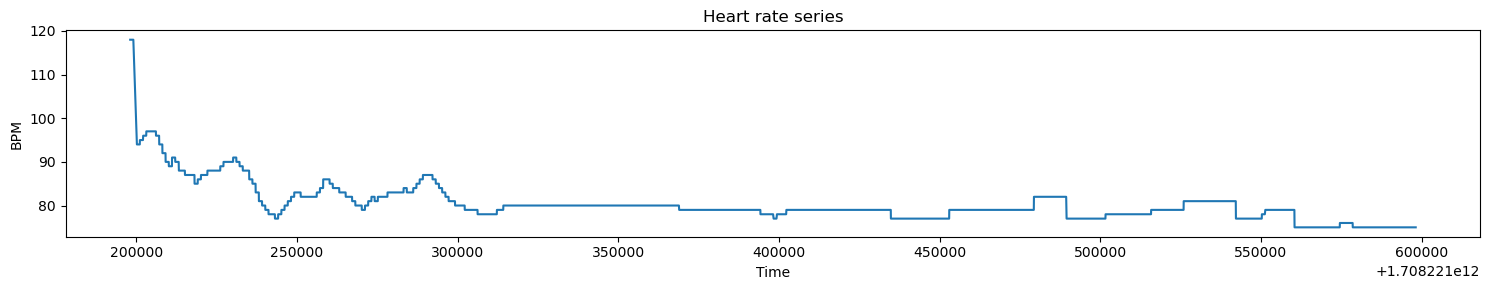

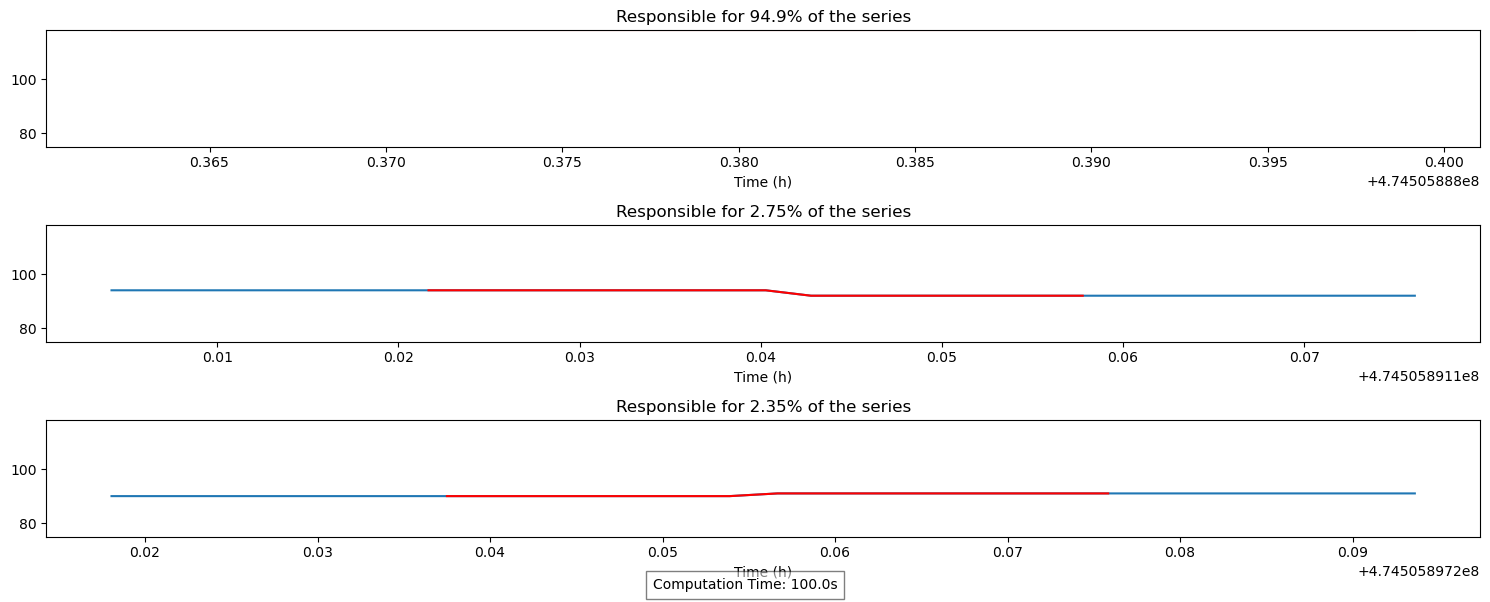

Computing 3 snippets for signal with freq: 0.04Hz using subsequency size: 15...
Computation time: 97.0s


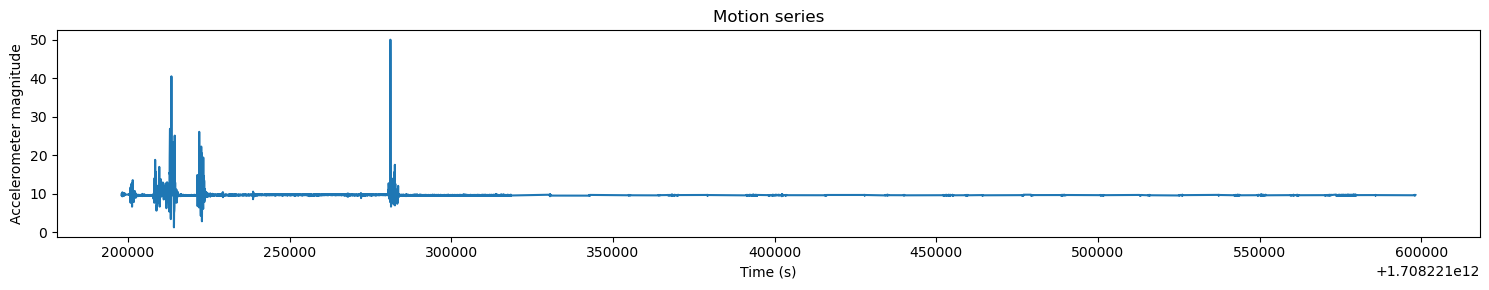

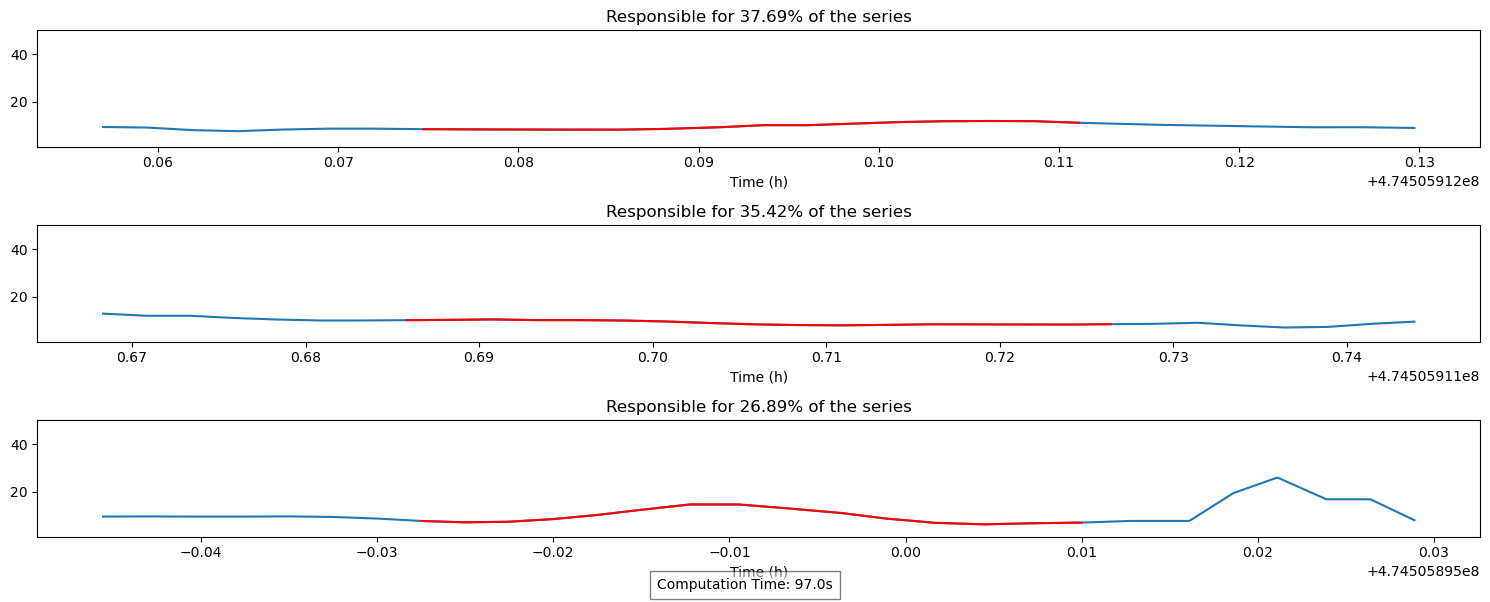





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_02-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 291.0s


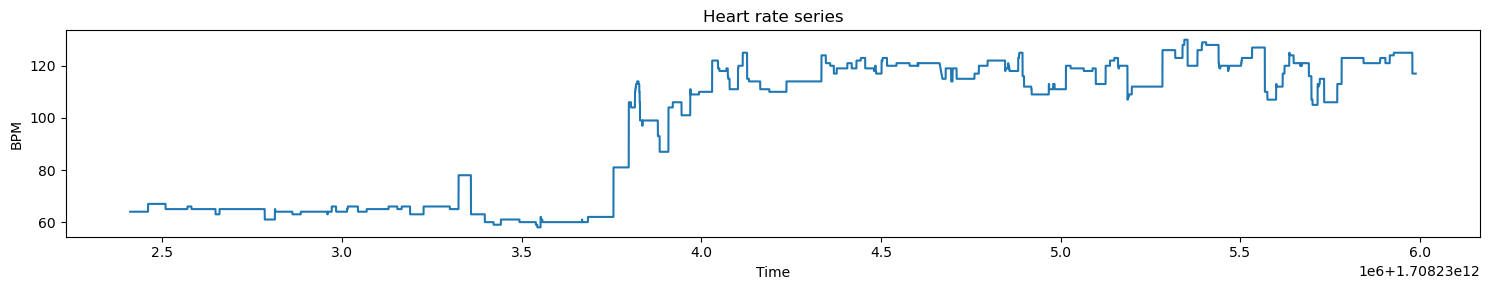

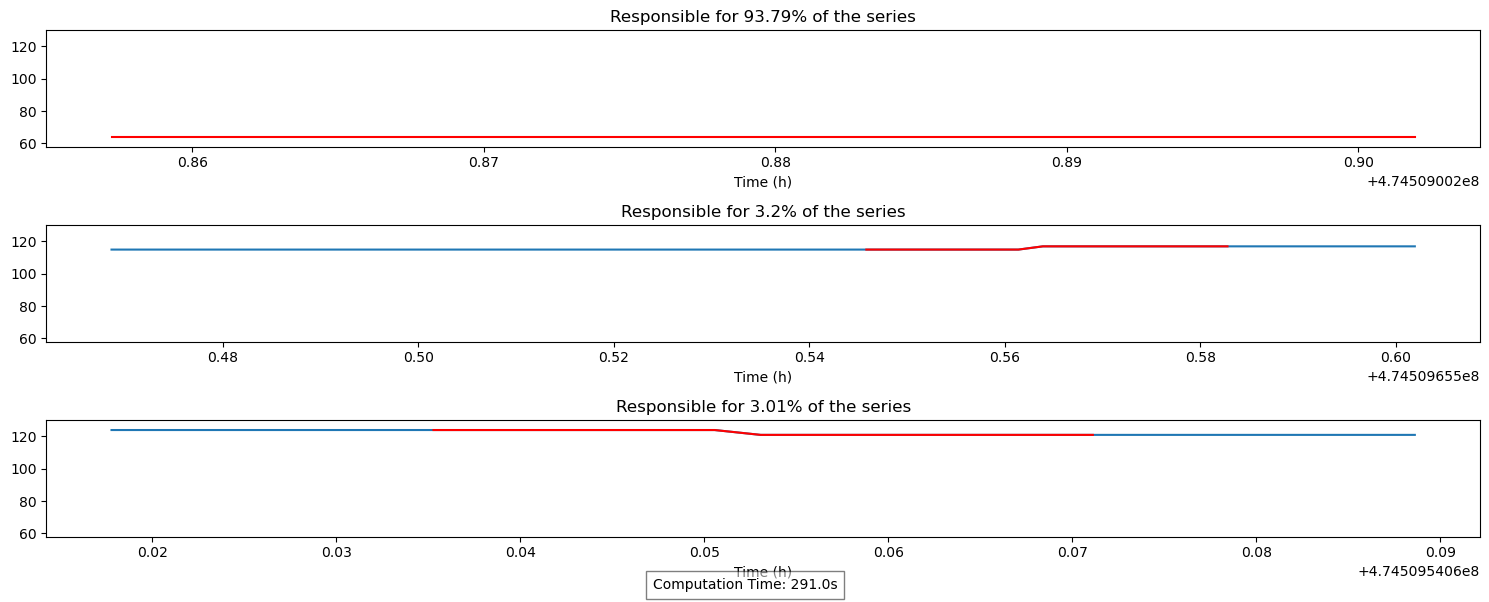

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 289.0s


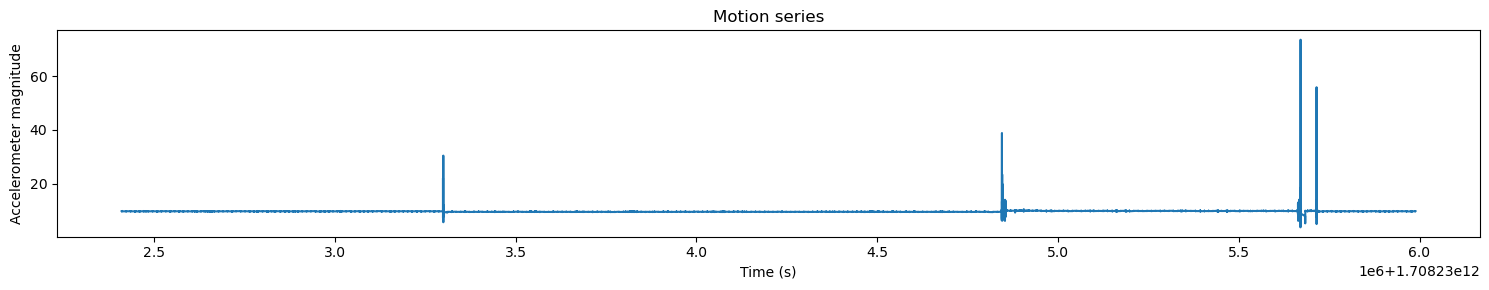

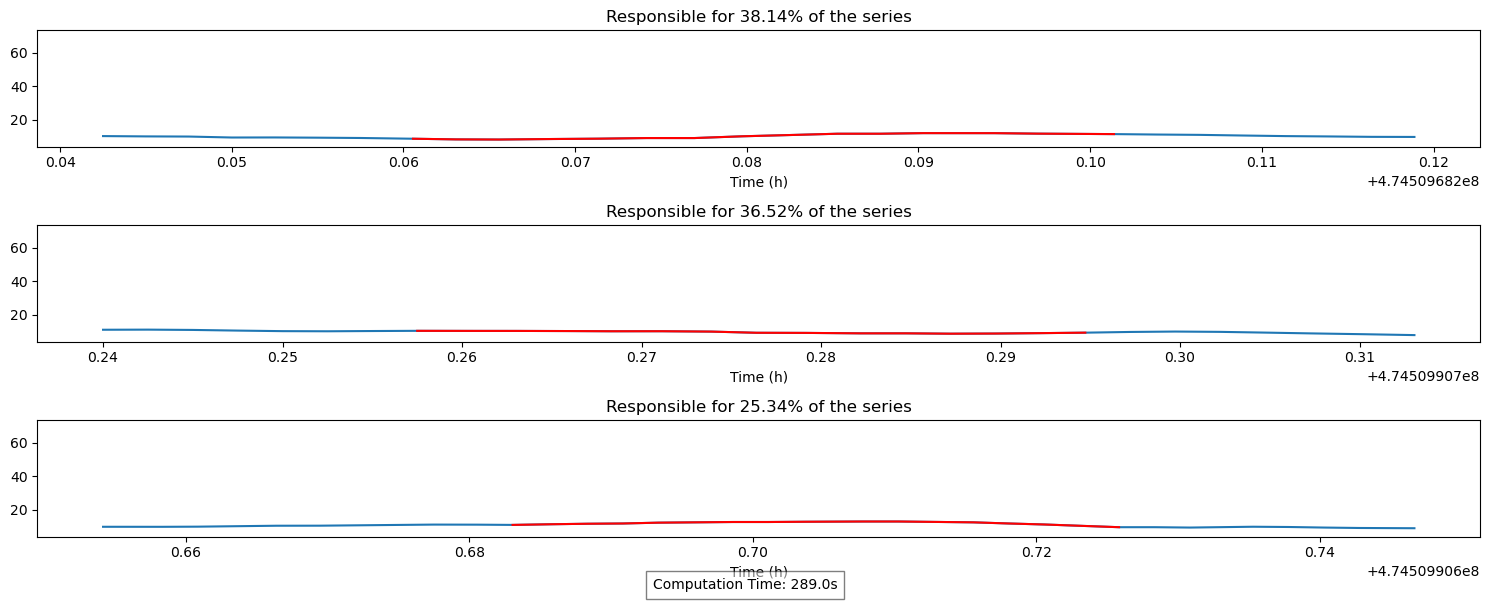





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-17_23-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.02Hz using subsequency size: 15...
Computation time: 1159.0s


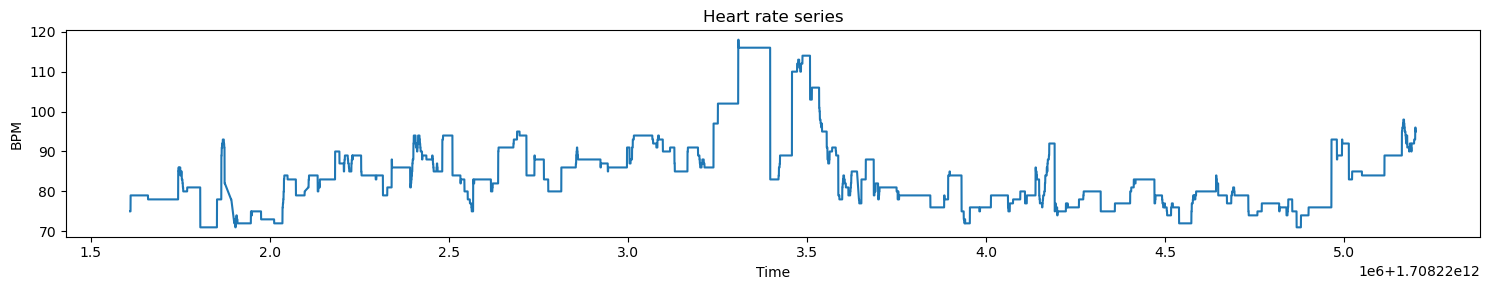

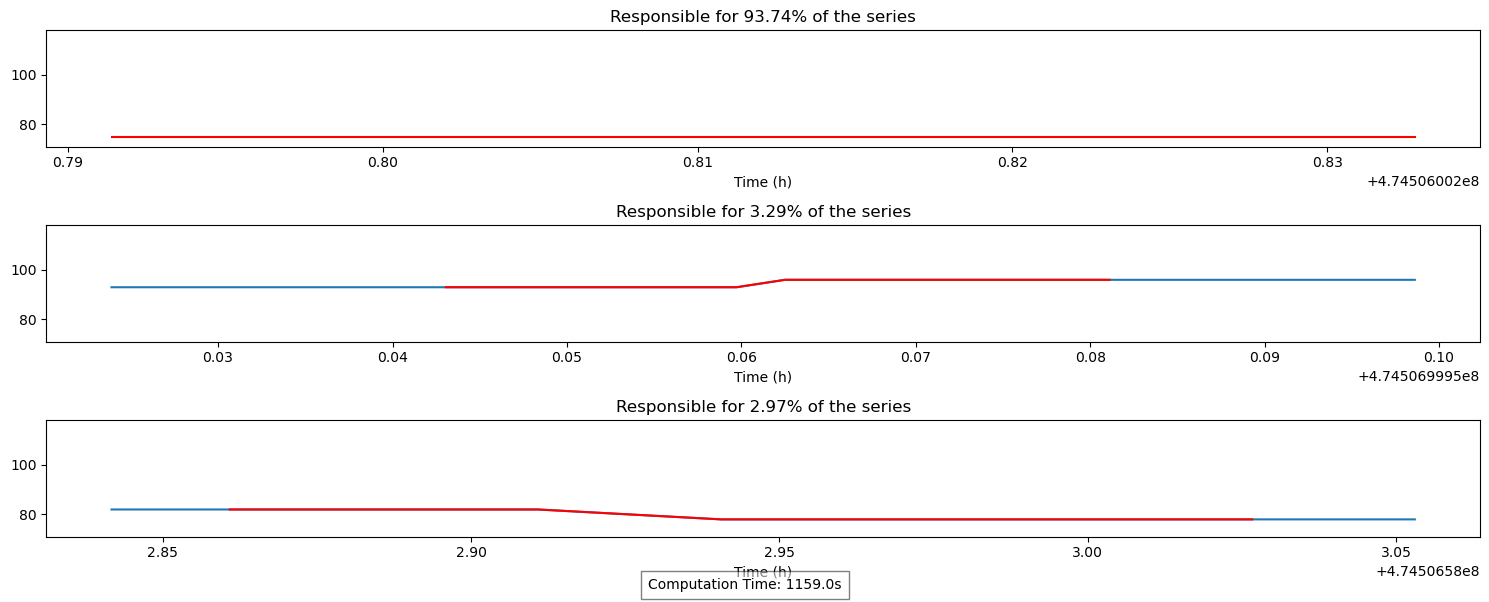

Computing 3 snippets for signal with freq: 0.02Hz using subsequency size: 15...
Computation time: 1151.0s


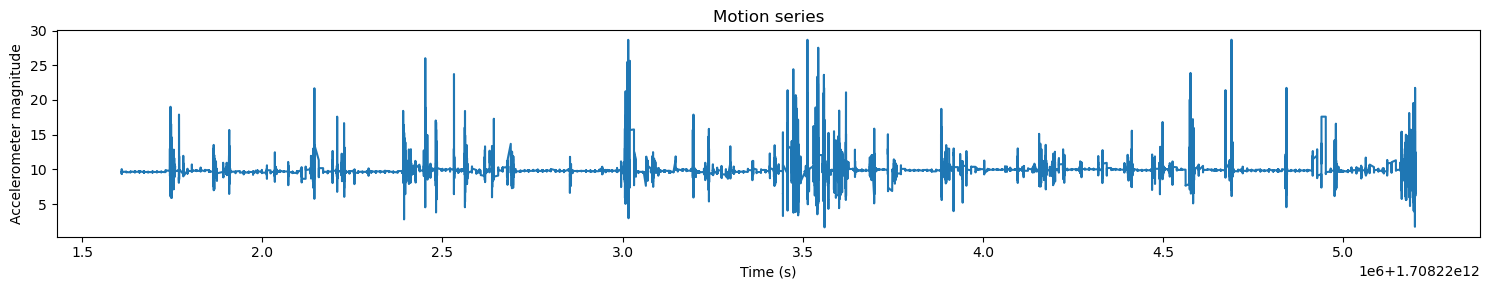

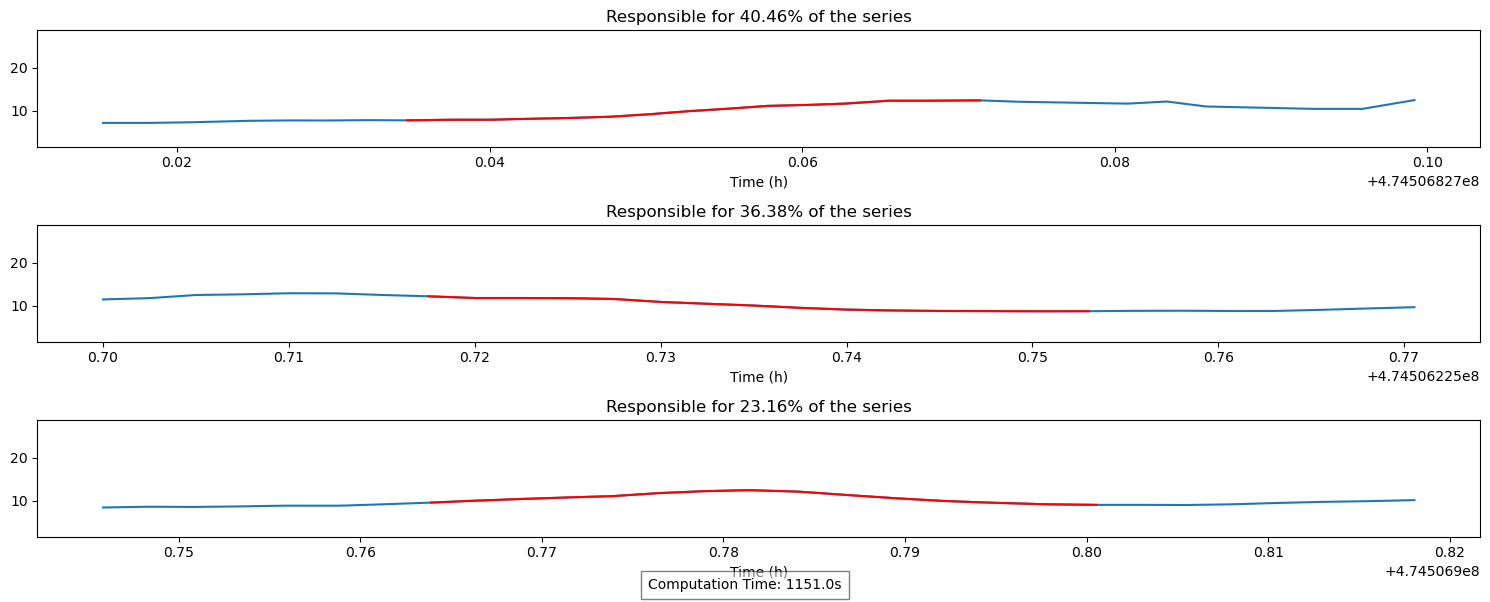





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_00-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 530.0s


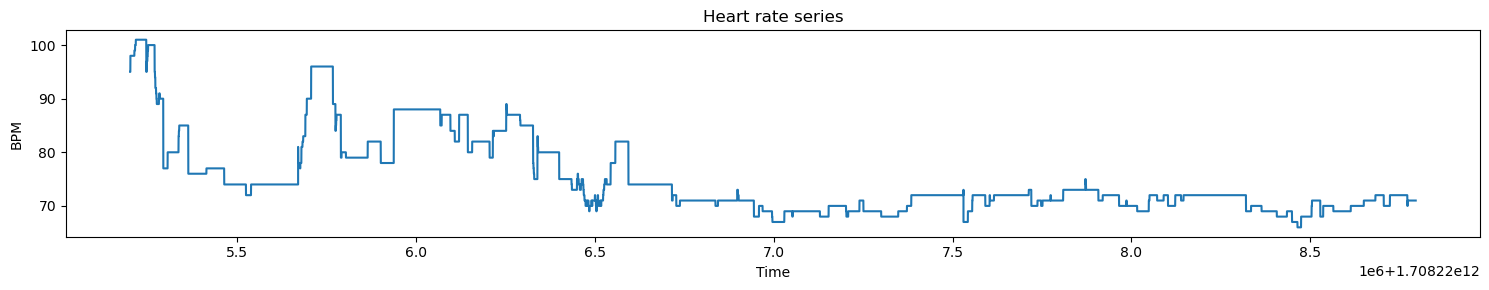

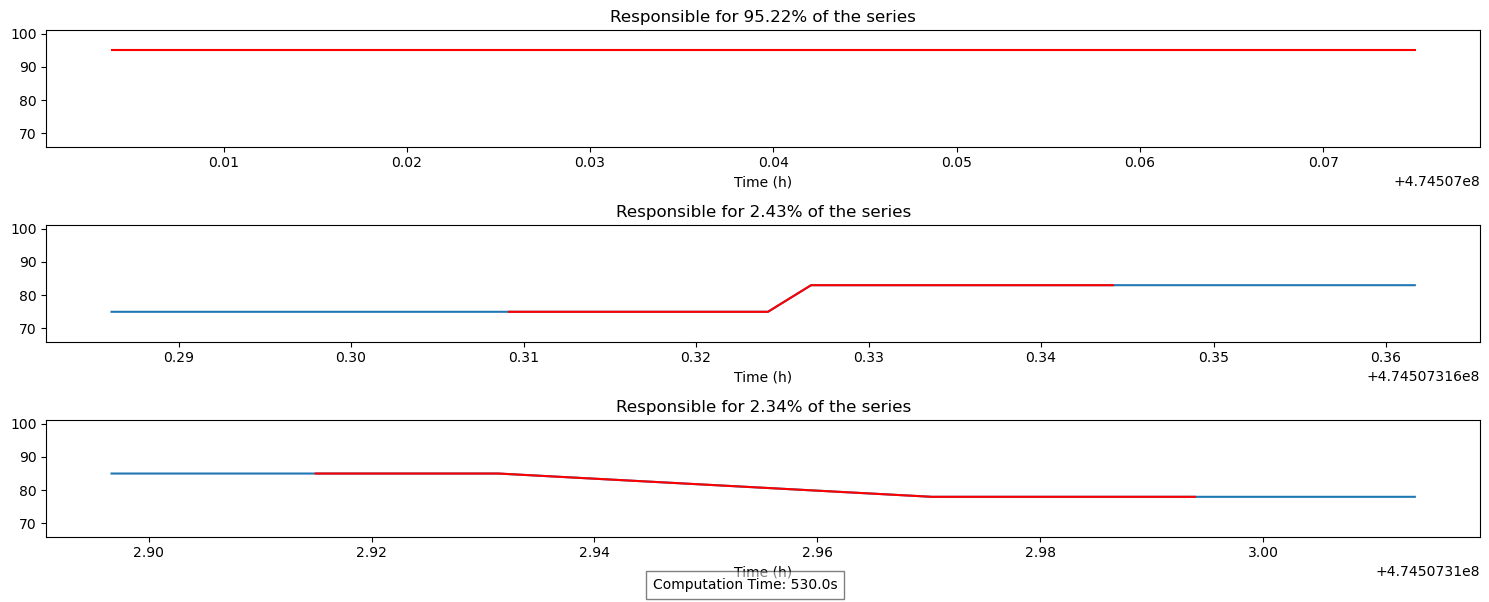

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 528.0s


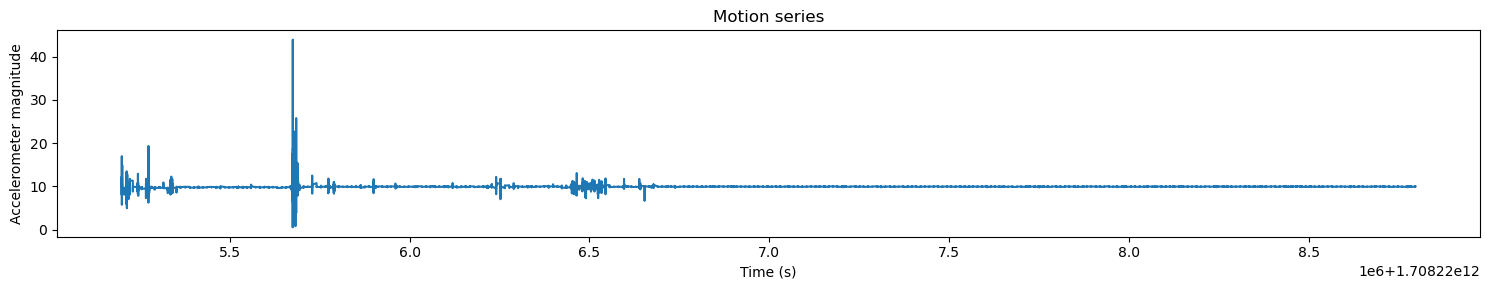

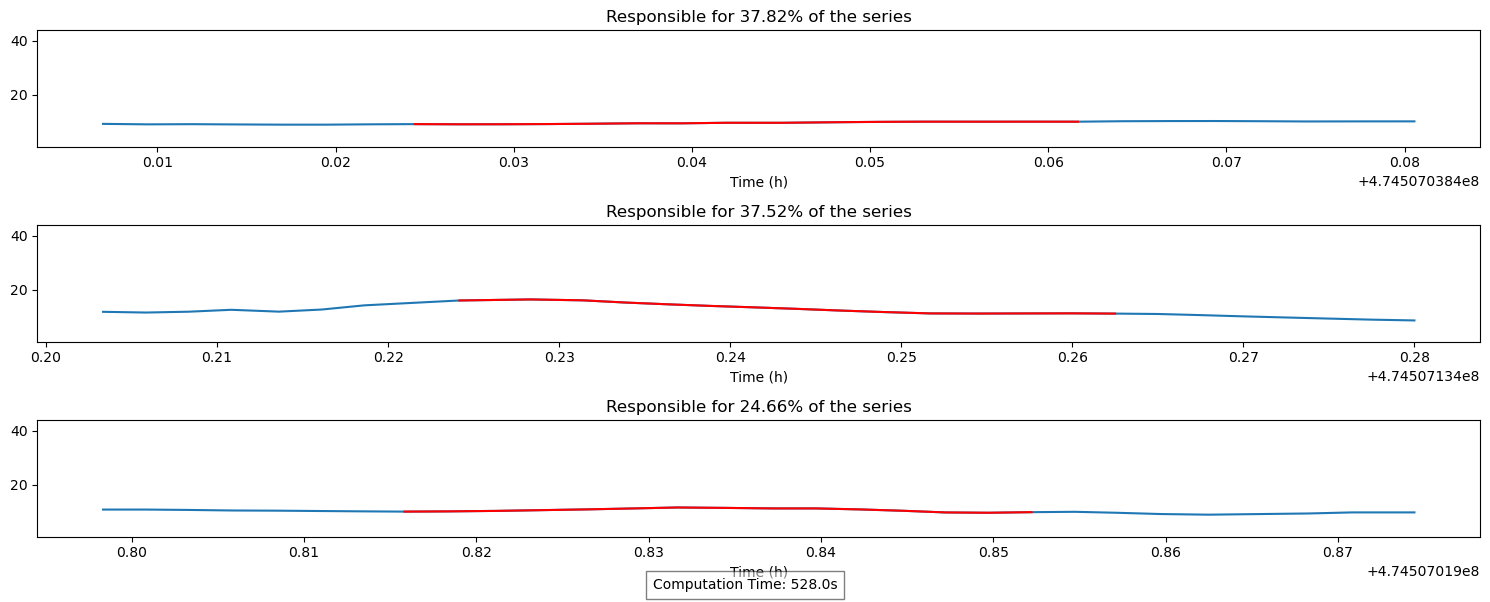





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_01-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 231.0s


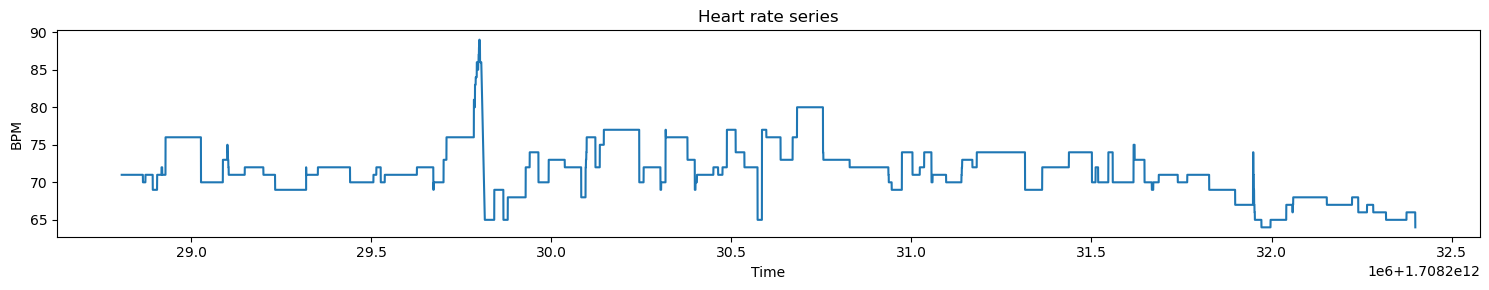

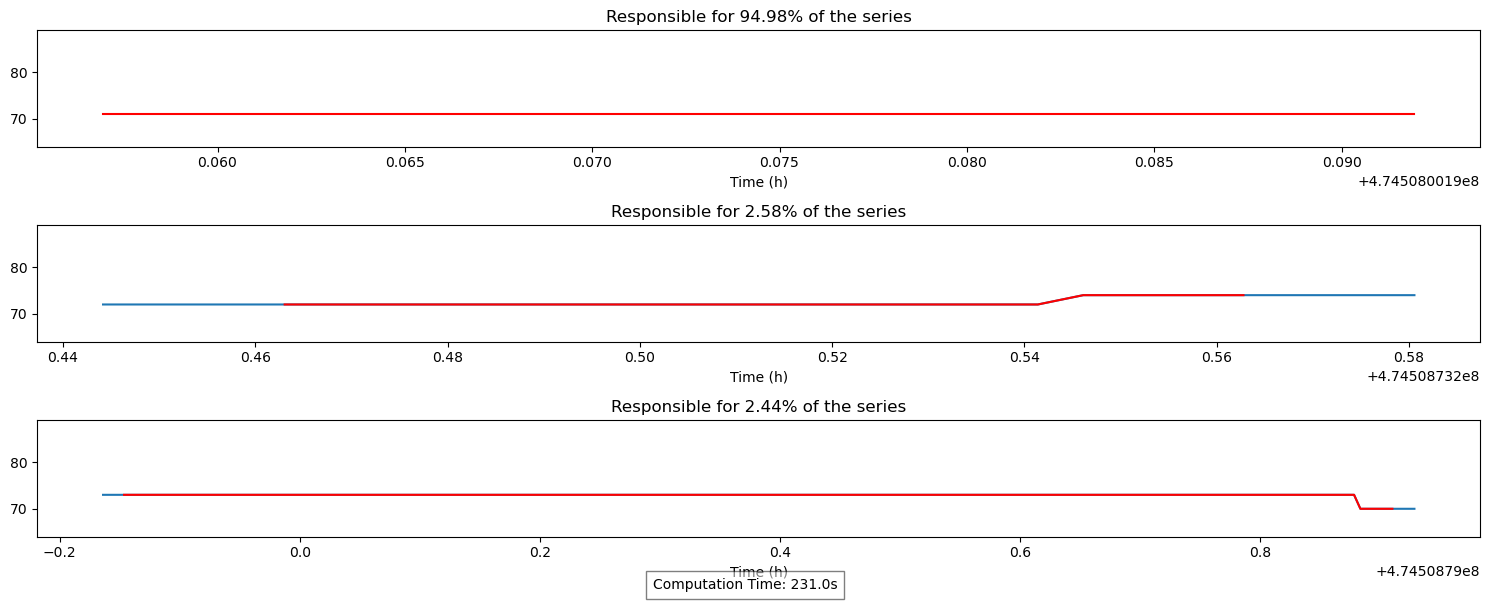

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 230.0s


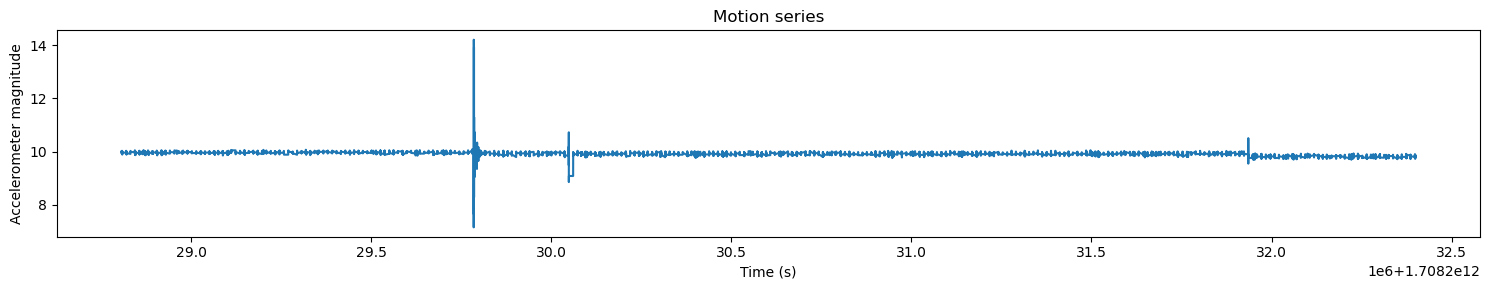

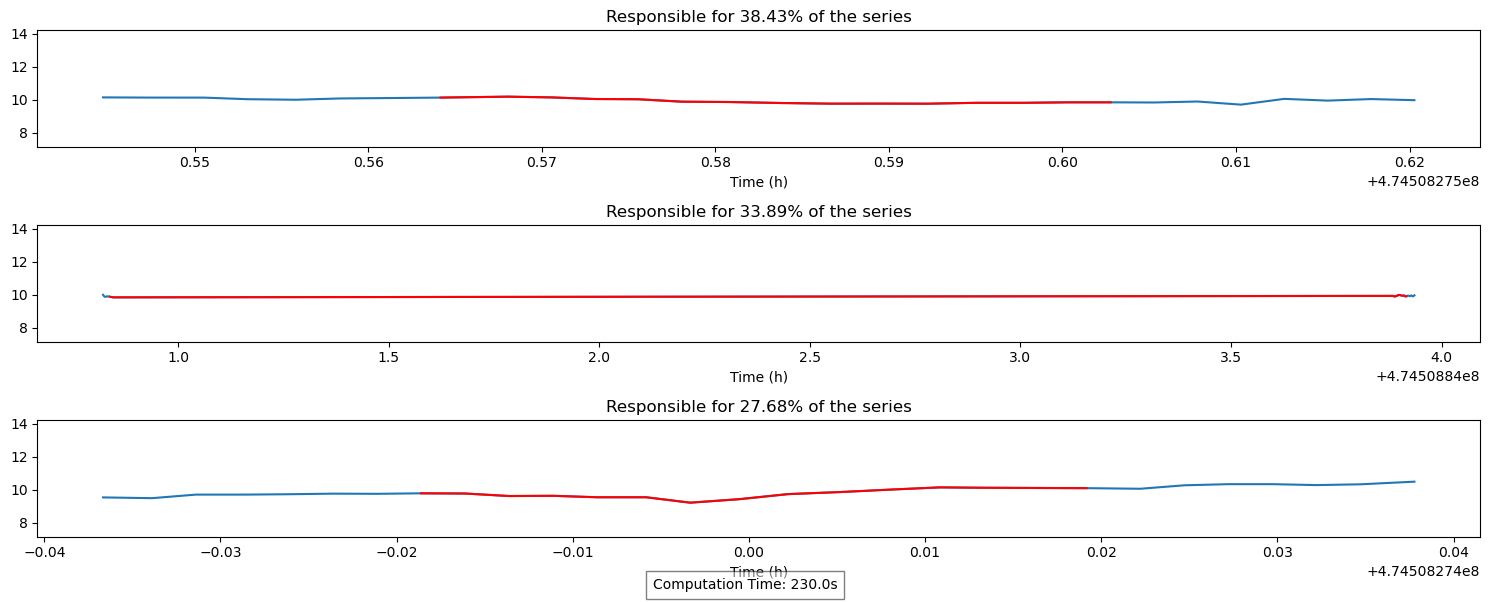





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_03-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 264.0s


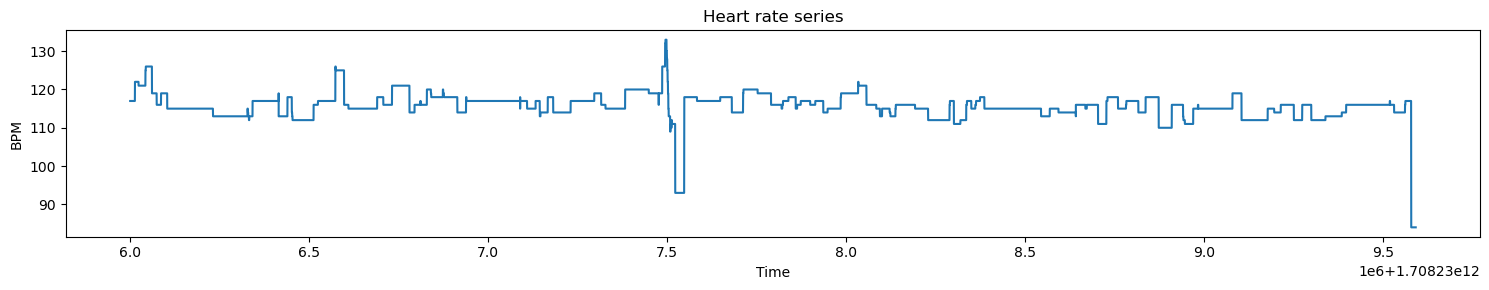

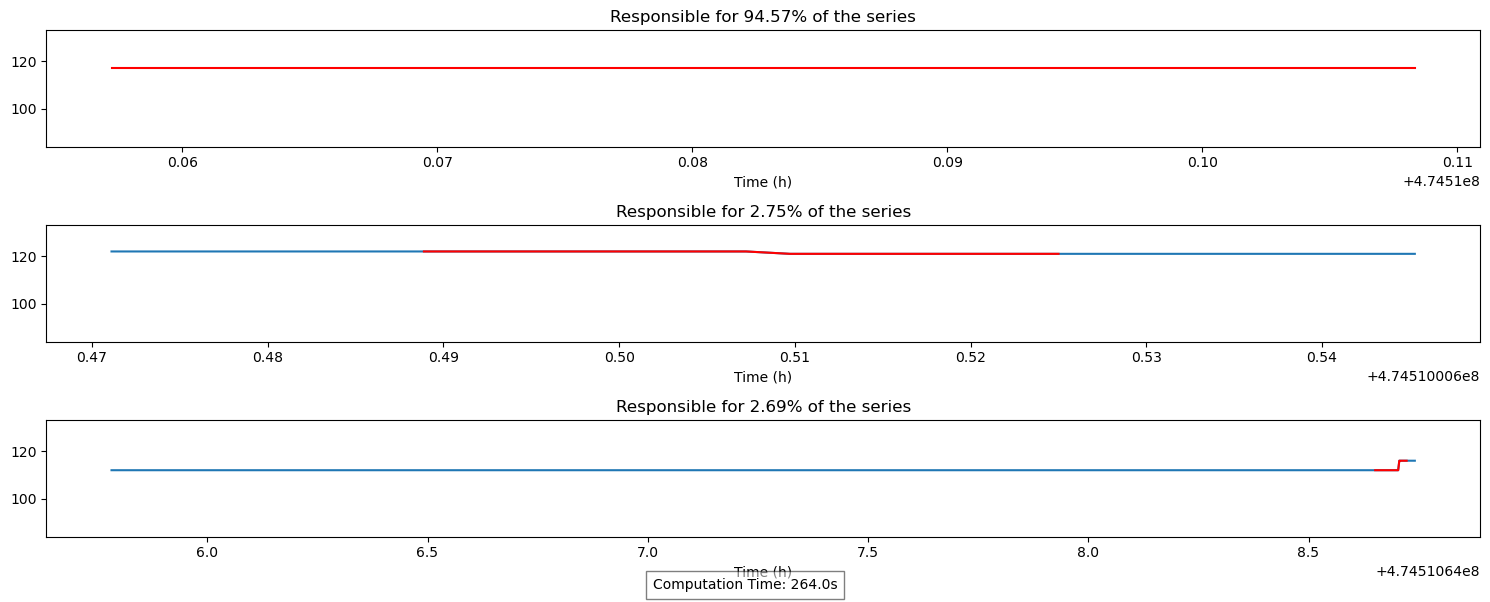

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 260.0s


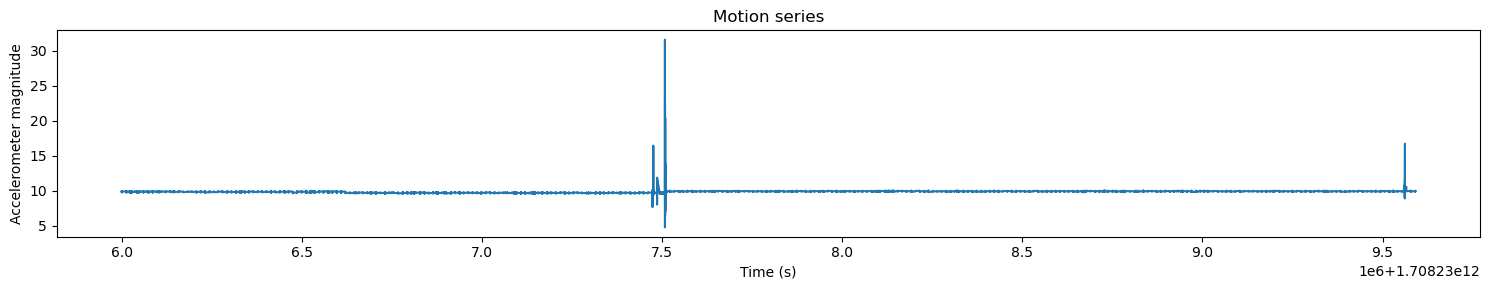

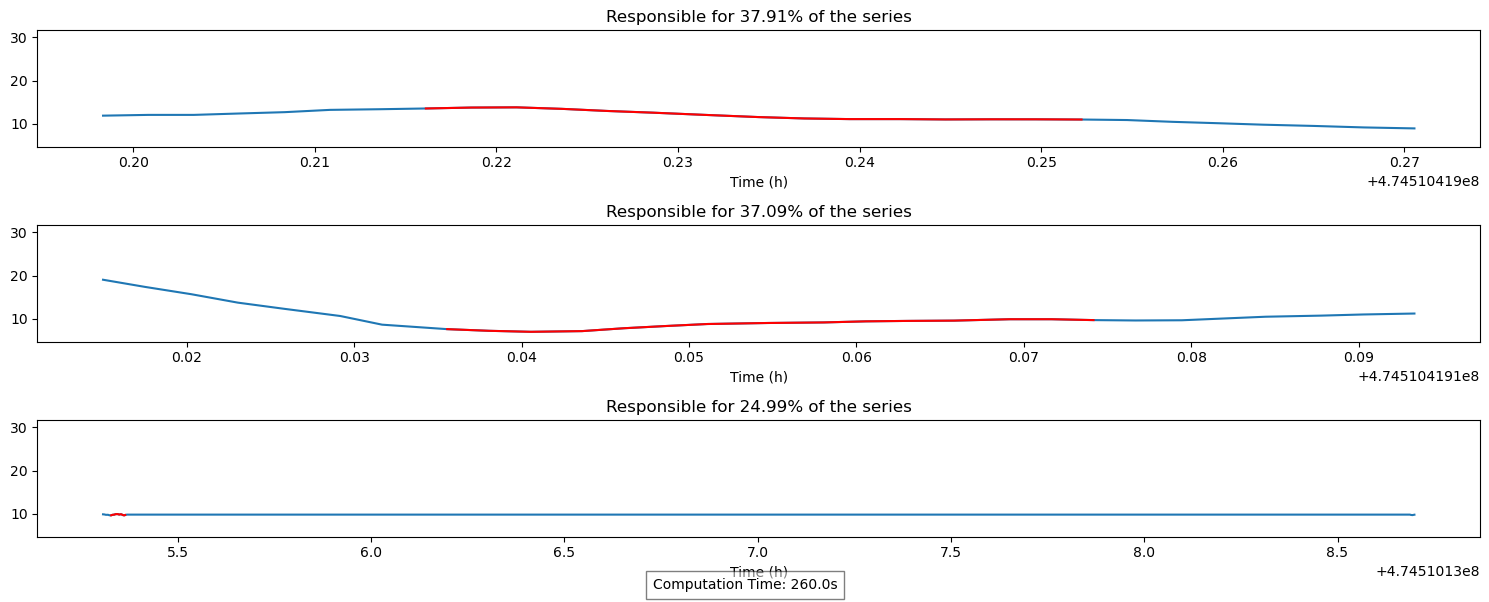





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_06-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 378.0s


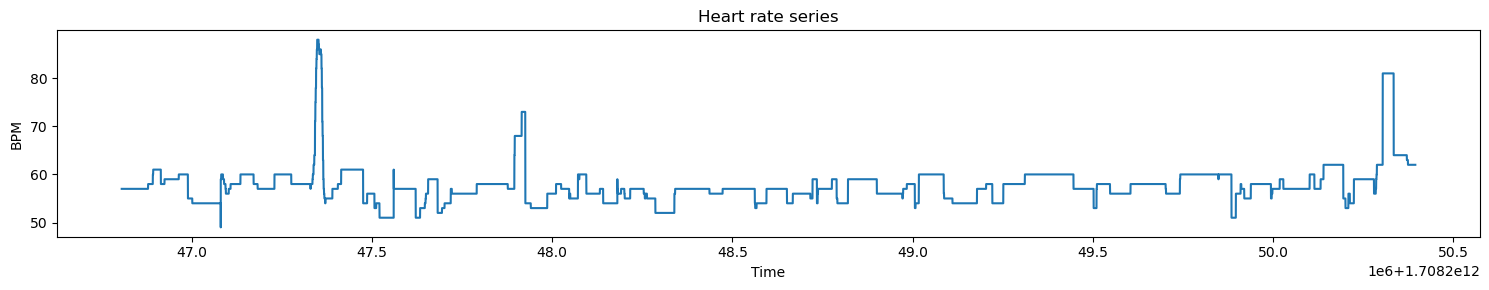

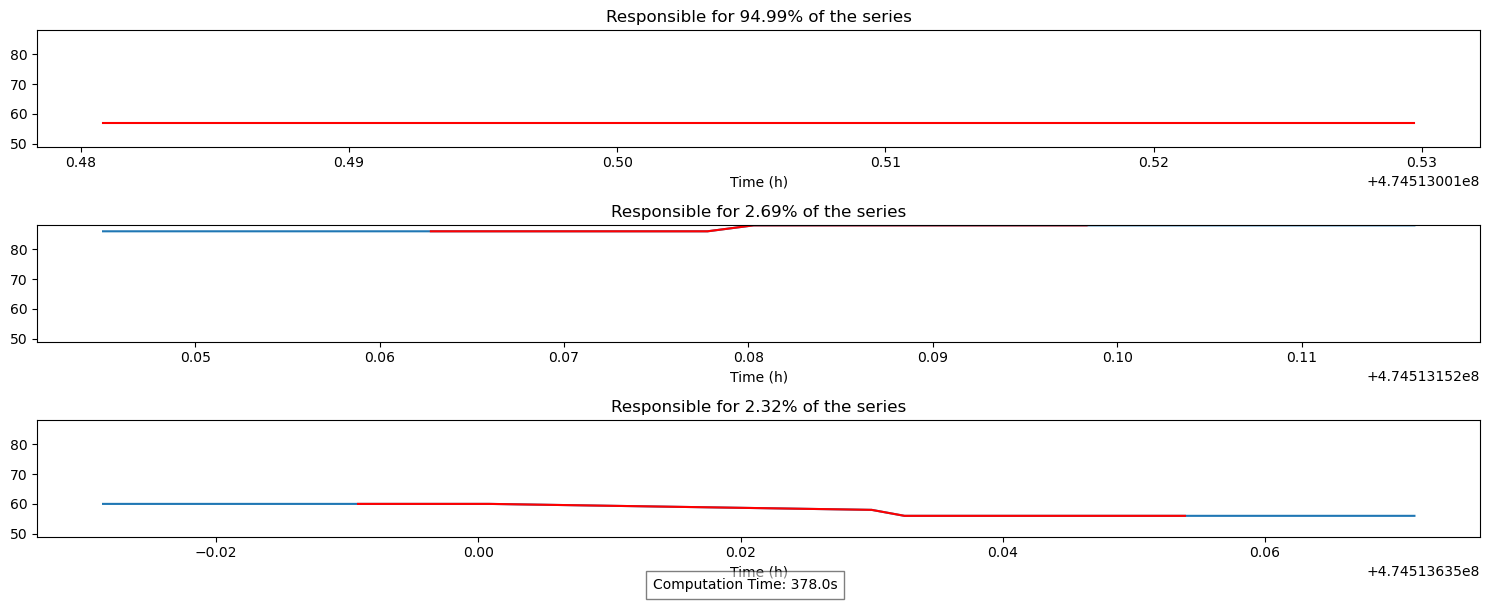

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 376.0s


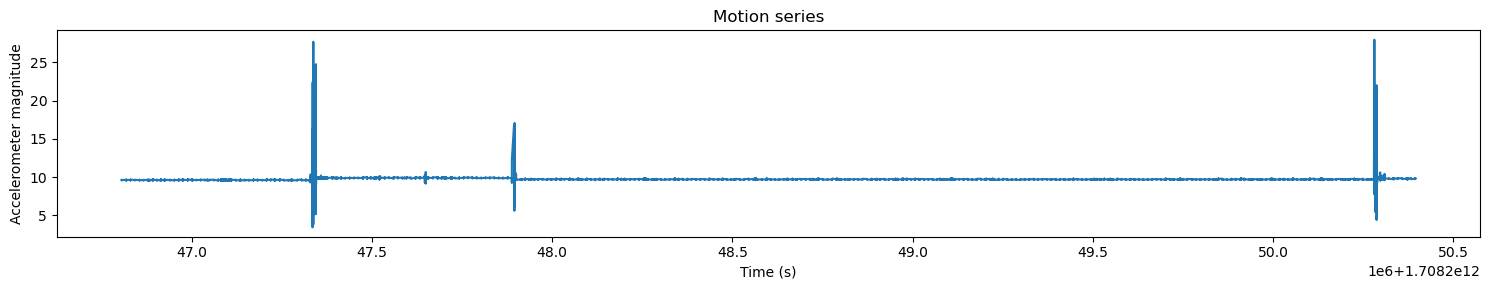

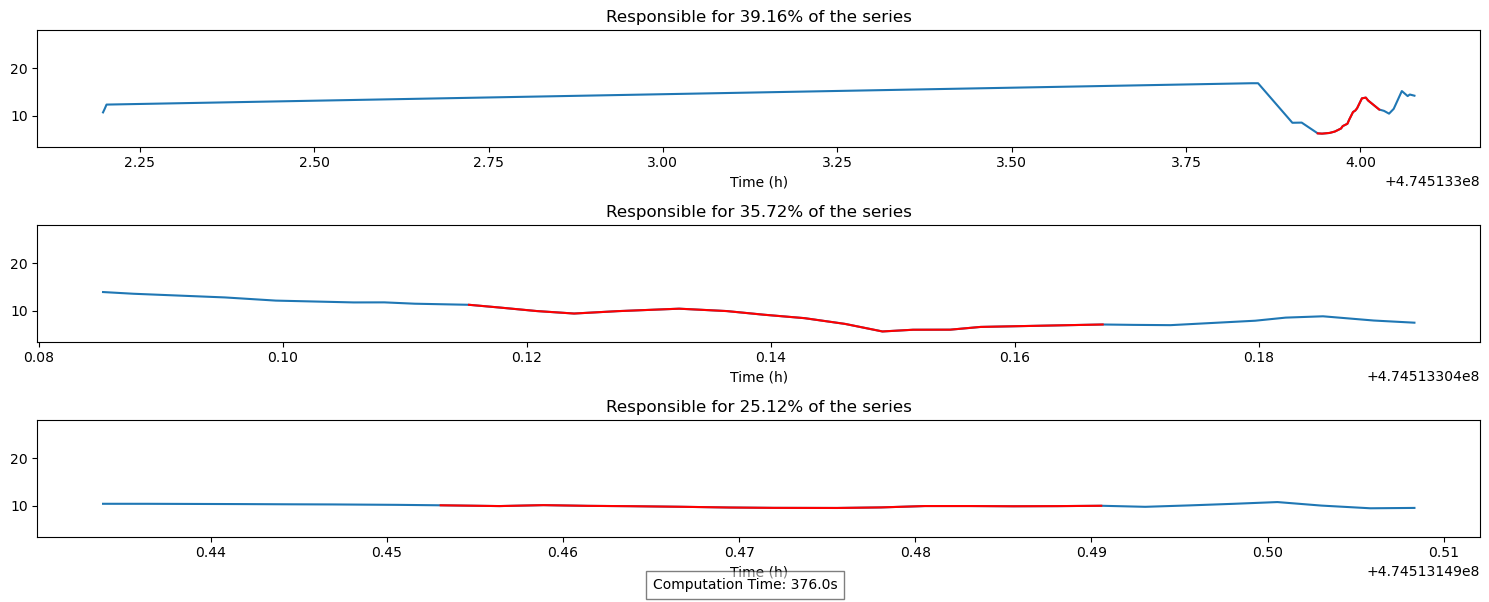





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_07-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 342.0s


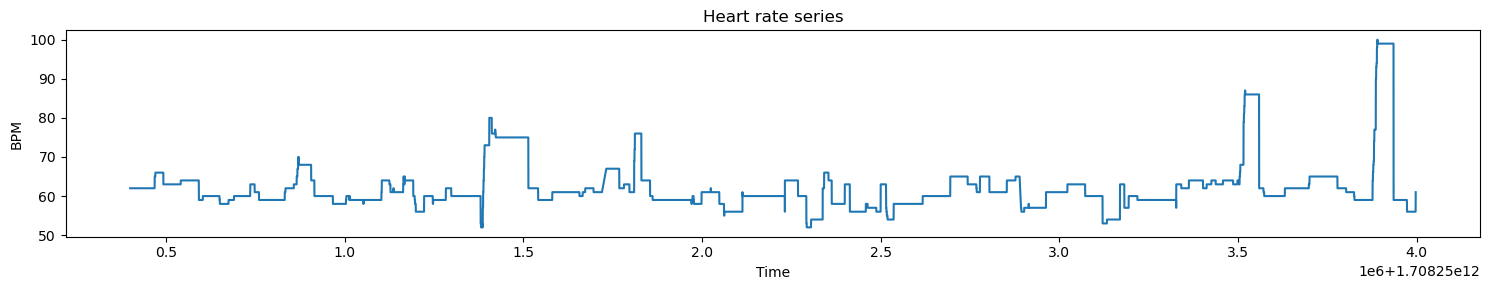

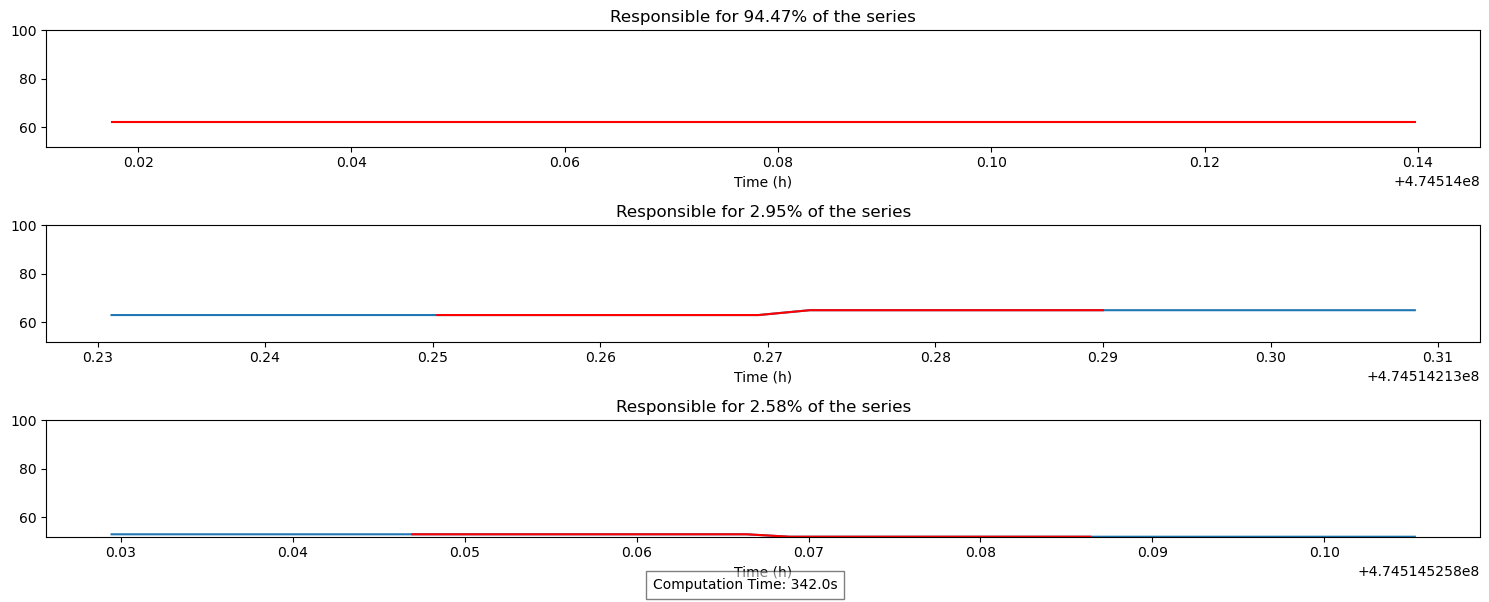

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 344.0s


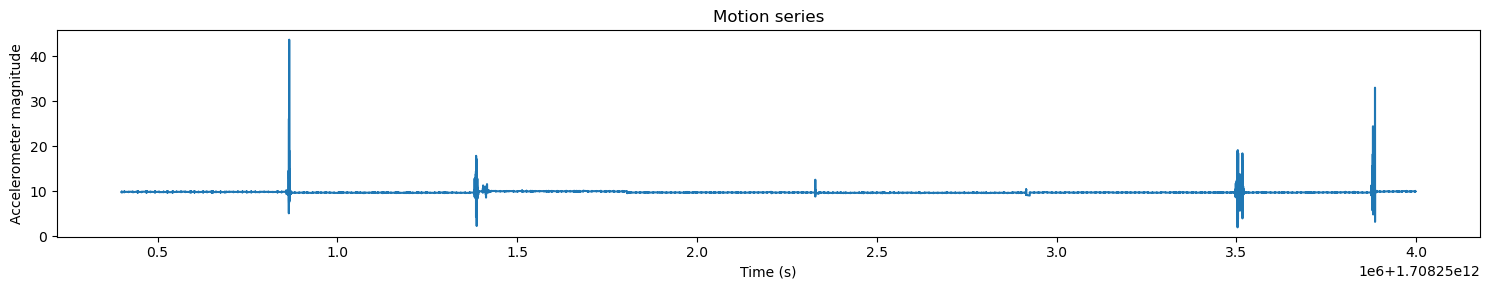

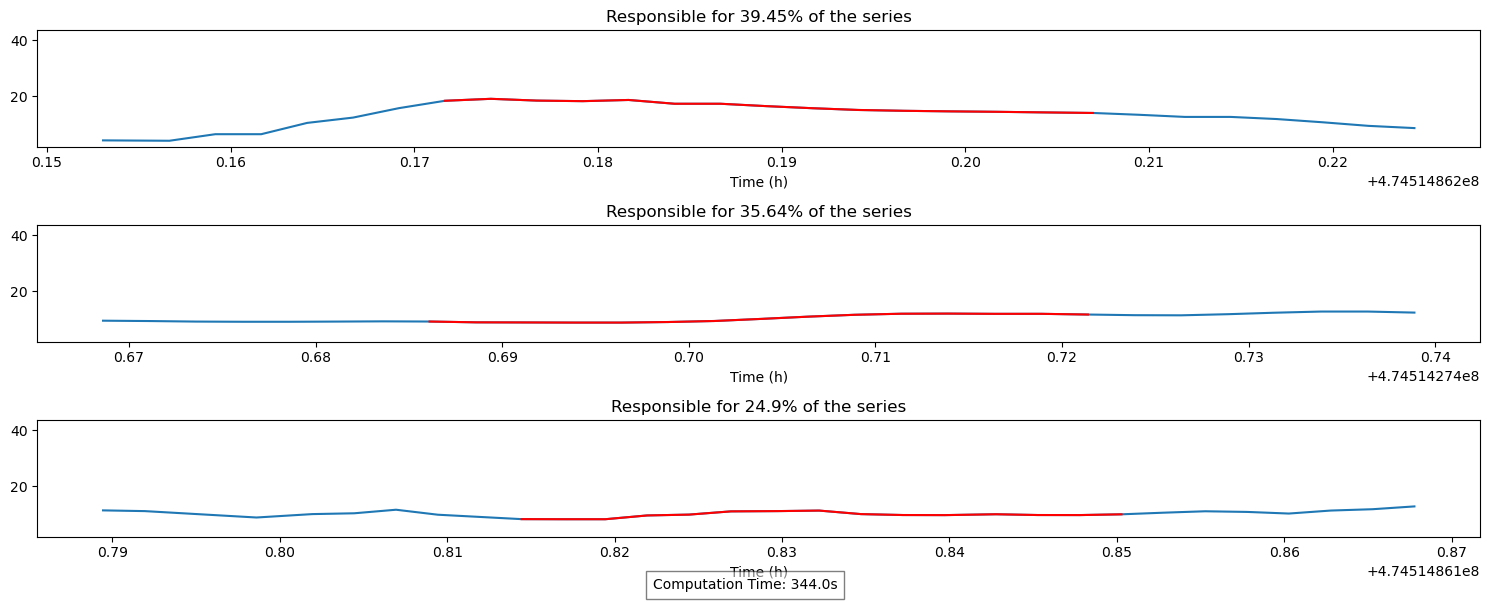





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_04-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 444.0s


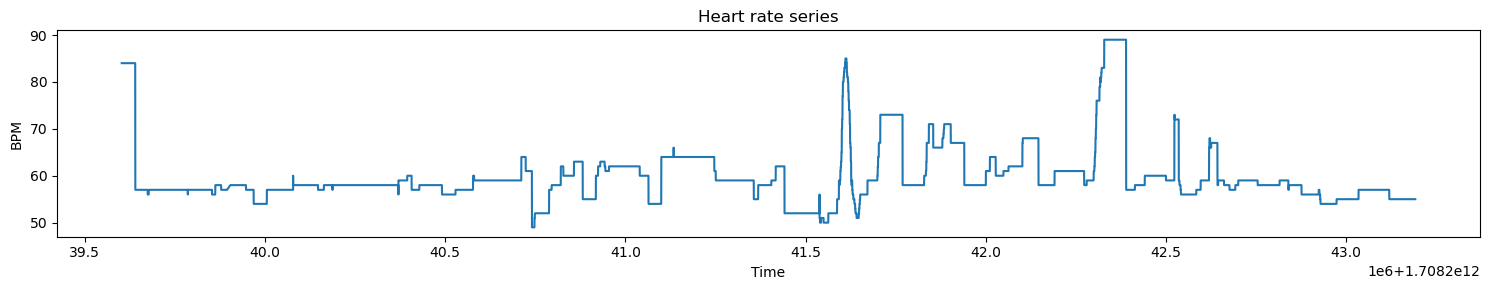

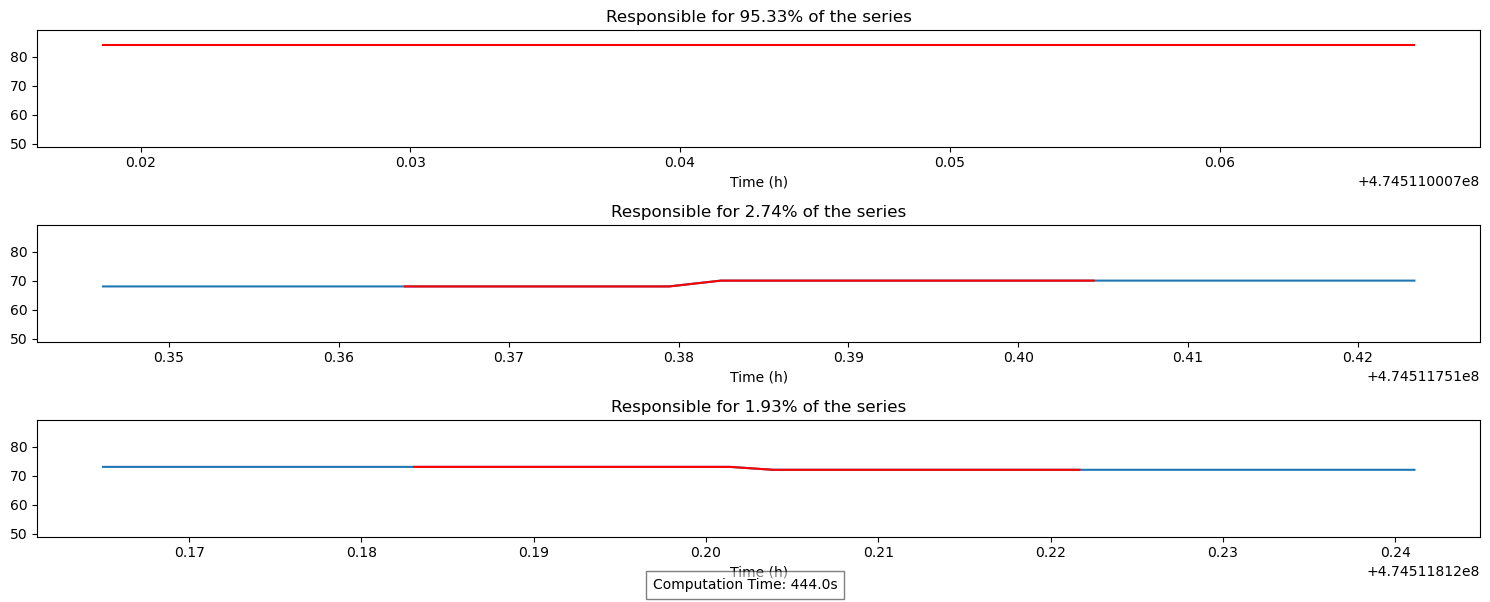

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 444.0s


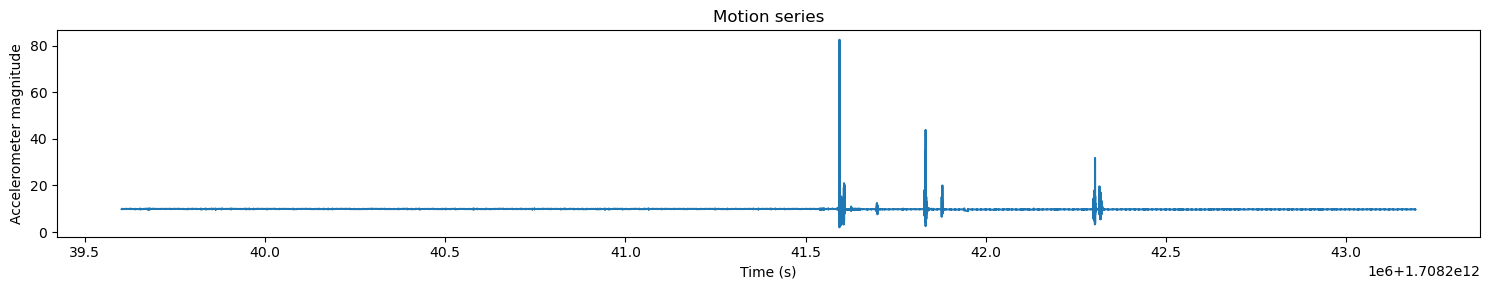

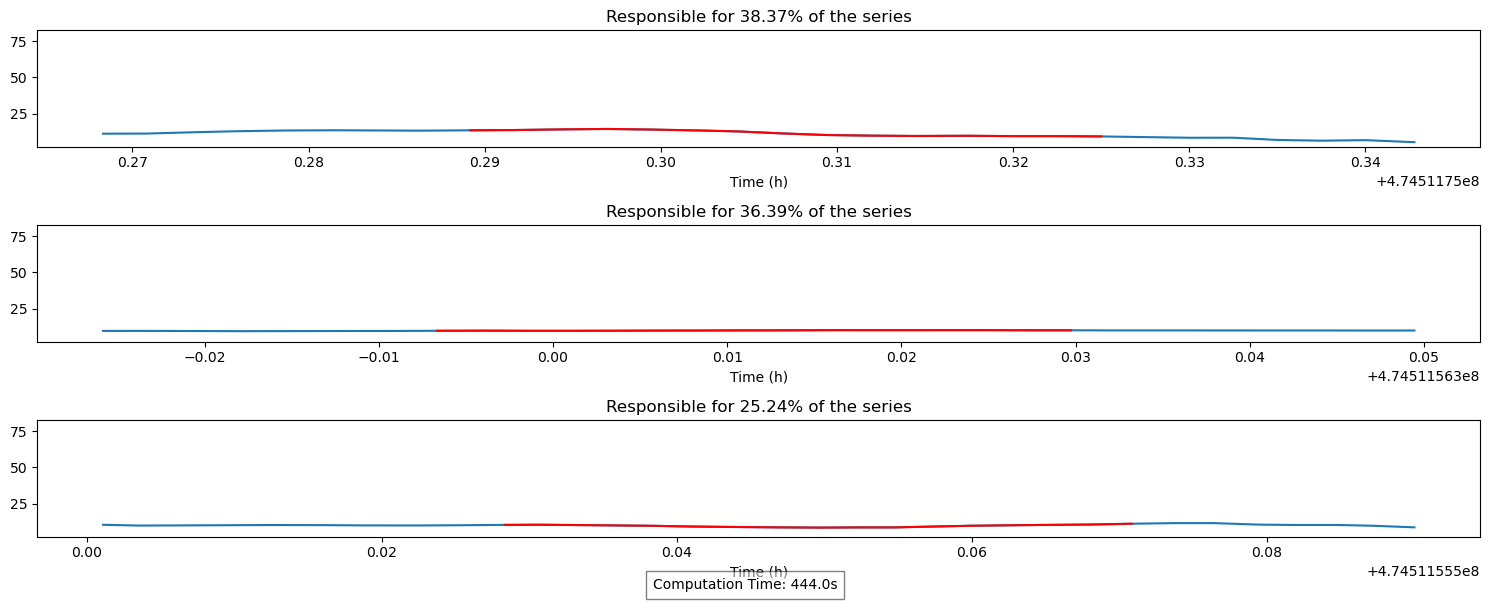





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_05-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 314.0s


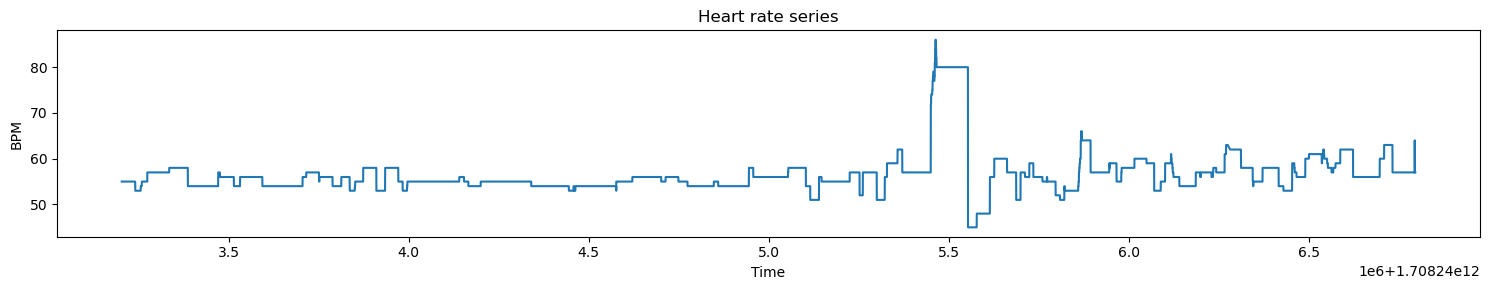

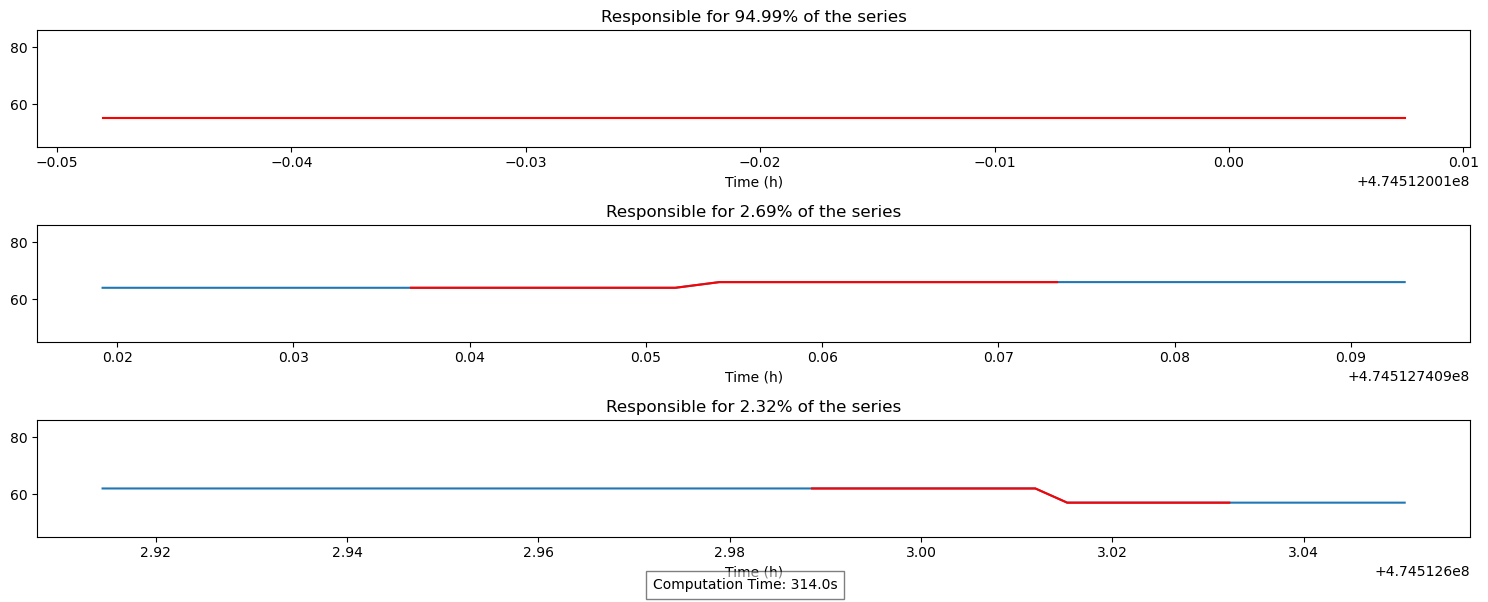

Computing 3 snippets for signal with freq: 0.01Hz using subsequency size: 15...
Computation time: 313.0s


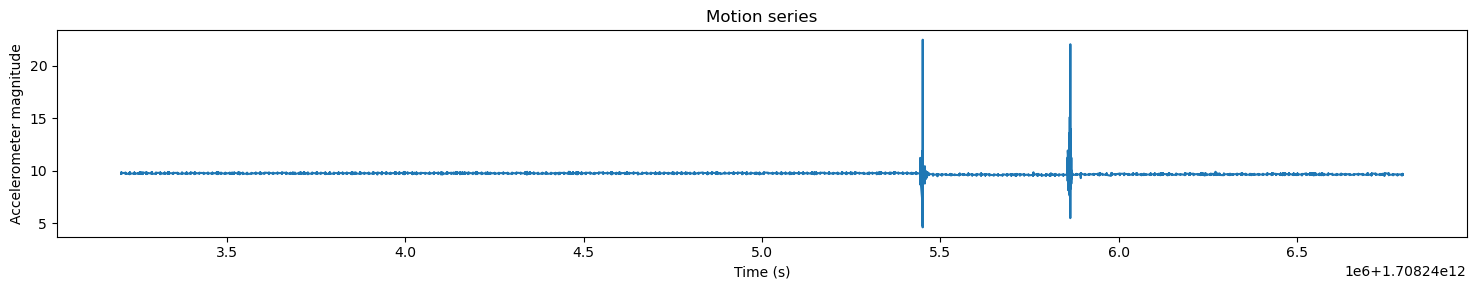

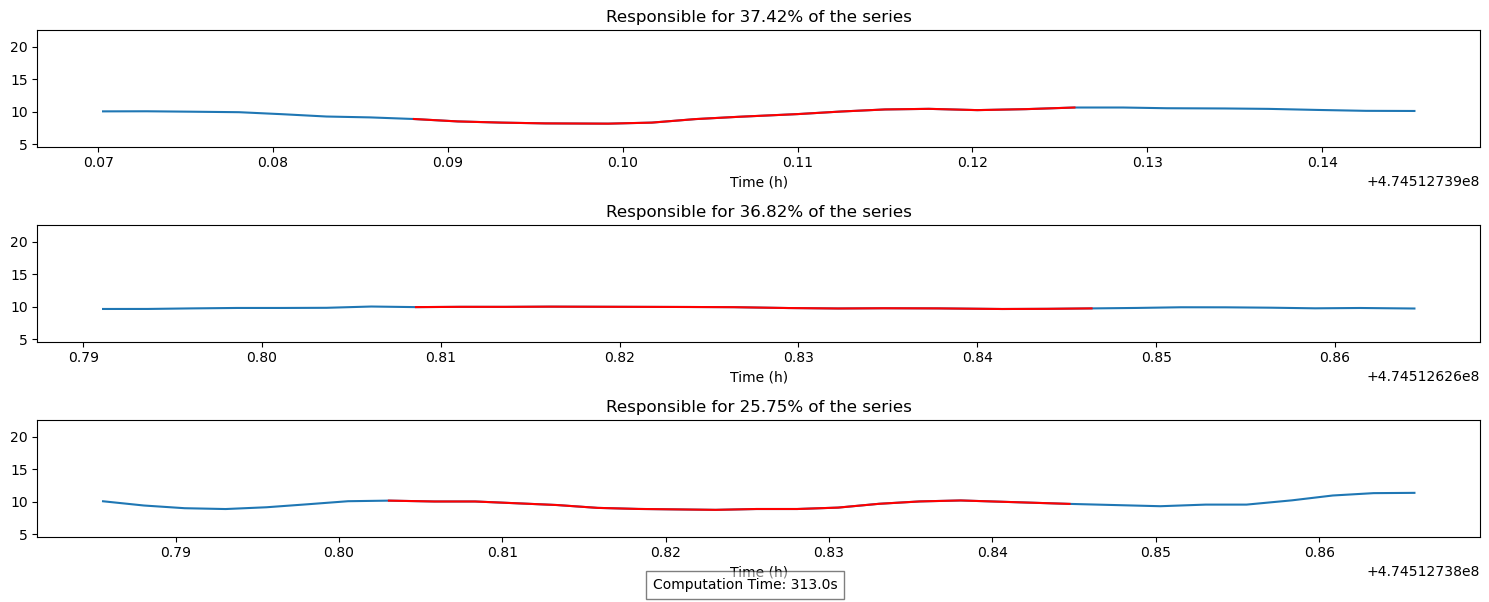





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- .ipynb_checkpoints =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


IsADirectoryError: [Errno 21] Is a directory: 'time_cuts/.ipynb_checkpoints'

In [3]:
for dataframe in os.listdir('time_cuts'):
    print('\n\n\n')
    print('=-'*36, dataframe, '=-'*36)
    sleep_df= pd.read_csv(f'time_cuts/{dataframe}')
    sleep_df['HEART_RATE(bpm)'].replace(0.0, np.nan, inplace=True)
    sleep_df.dropna(subset=['HEART_RATE(bpm)'], inplace=True)
    sleep_df = sleep_df[['timestamp', 'ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z', 'STEP_COUNT', 'HEART_RATE(bpm)']]
    sleep_df.rename(columns={'timestamp':'time', 'ACC_X(m/s^2)':'x', 'ACC_Y':'y', 'ACC_Z':'z', 'STEP_COUNT':'steps', 'HEART_RATE(bpm)':'bpm'}, inplace=True)
    poss = ["N1", "N2", "N3", 4, "REM"]
    states = choices(poss, k=len(sleep_df.index))
    sleep_df['stage'] = states
    df_dict = {}

    for folder in folders:
        if folder == 'motion':
            df_dict[folder] = sleep_df[['time', 'x', 'y', 'z']]
        elif folder == 'heart_rate':
            df_dict[folder] = sleep_df[['time', 'bpm']]
        elif folder == 'steps':
            df_dict[folder] = sleep_df[['time', 'steps']]
        elif folder == 'labels':
            df_dict[folder] = sleep_df[['time', 'stage']]

    polygraph_end_time = df_dict["labels"].time.max()
    for folder in df_dict:
        folder_df = df_dict[folder]
        df_dict[folder] = folder_df[folder_df.time <= polygraph_end_time]
        
    base_path = f'cover_area_result/{dataframe}'
    os.makedirs(base_path, exist_ok=True)
    
    ts = df_dict["heart_rate"]["bpm"].values.astype(float)
    time_idx = df_dict["heart_rate"]["time"].values
    raw_snippets_hr, subseq_size, snippets, snippets_profiles, snippet_fractions, areas, curve, regime_hr, comp_time = find_snippets(df_dict["heart_rate"], "bpm")
    np.save(f'{base_path}/hr.npy', raw_snippets_hr)

    plt.figure(figsize=(15,3))
    plt.title("Heart rate series")
    plt.plot(df_dict["heart_rate"]["time"], df_dict["heart_rate"]["bpm"].values)
    plt.xlabel("Time")
    plt.ylabel("BPM")
    plt.tight_layout()
    plt.savefig(f'{base_path}/heart_rate_series.png')
    plt.show()

    plot_results(ts, time_idx, snippets, areas.sum(), snippet_fractions, curve, subseq_size, save_path=f'{base_path}/hr_snippets.png', comp_time=comp_time)
    plt.show()

    df_dict["motion"]["magnitude"] = df_dict["motion"][["x","y","z"]].apply(lambda x: norm(x.values), axis=1)

    ts = df_dict["motion"]["magnitude"].values.astype(float)
    time_idx = df_dict["motion"]["time"].values
    raw_snippets_motion, subseq_size, snippets, snippets_profiles, fractions, areas, curve, regime_motion, comp_time = find_snippets(df_dict["motion"], "magnitude")
    np.save(f'{base_path}/motion.npy', raw_snippets_motion)

    plt.figure(figsize=(15,3))
    plt.title("Motion series")
    plt.plot(df_dict["motion"]["time"], df_dict["motion"]["magnitude"].values)
    plt.xlabel("Time (s)")
    plt.ylabel("Accelerometer magnitude")
    plt.tight_layout()
    plt.savefig(f'{base_path}/motion_series.png')
    plt.show()

    plot_results(ts, time_idx, snippets, areas.sum(), fractions, curve, subseq_size, save_path=f'{base_path}/motion_snippets.png', comp_time=comp_time)
    plt.show()

In [ ]:
print('finalizou')

## Cover Area PSF

In [4]:
folders = [
    "heart_rate",
    "labels",
    "motion",
    "steps"
]

def get_freq(df):
    time_idx = df.time
    mean_sample_interval = time_idx.rolling(2).aggregate(lambda ts: ts.values[1] - ts.values[0]).mean()
    return 1/mean_sample_interval

def get_clustered_profiles(T, m, num_clusters, selection_method="medoid", num_nearest=3):
    segments = np.array([T[i: i + m] for i in range(len(T) - m + 1)])
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=0).fit(segments)
    centroids = kmeans.cluster_centers_

    closest_snippets = []
    for center_idx, center in enumerate(centroids):
        distances = np.linalg.norm(segments - center, axis=1)
        
        if selection_method == "medoid":
            # Escolhe o snippet mais próximo do centroide
            closest_snippet_idx = np.argmin(distances)
            closest_snippets.append(closest_snippet_idx)
        
        elif selection_method == "mean":
            # Escolhe a média dos `num_nearest` snippets mais próximos
            nearest_indices = np.argsort(distances)[:num_nearest]
            mean_index = int(np.mean(nearest_indices))
            closest_snippets.append(mean_index)
        
        elif selection_method == "mode":
            # Escolhe a moda dos índices dos snippets dentro do cluster
            cluster_indices = np.where(kmeans.labels_ == center_idx)[0]
            closest_snippet_idx = mode(cluster_indices).mode[0]
            closest_snippets.append(closest_snippet_idx)
    
    # Cálculo da matriz de distâncias entre centroids
    D = np.zeros((num_clusters, num_clusters))
    for i in range(num_clusters):
        for j in range(num_clusters):
            D[i, j] = np.linalg.norm(centroids[i] - centroids[j])

    return D, kmeans.labels_, closest_snippets


def find_snippets_with_psf(df, series_col, k, num_clusters, subseq_size, base_path, calculation_method="norm", selection_method="medoid", num_nearest=3):
    # Se for para calcular o ENMO para o motion
    if series_col == "magnitude" and calculation_method == "enmo":
        ts = df[["x", "y", "z"]].apply(lambda row: max(norm(row) - 1, 0), axis=1).values.astype(float)
    else:  # Usar norma padrão ou dados de outras colunas (ex. bpm)
        ts = df[series_col].values.astype(float)
    
    freq = get_freq(df)
    D, labels, closest_snippets = get_clustered_profiles(ts, subseq_size, num_clusters)

    snippets, snippet_profiles, areas = [], [], []
    Q = np.full((1, D.shape[1]), np.inf)

    for _ in range(k):
        minimum_area = np.inf
        index_min = -1

        for i in range(D.shape[0]):
            profile_area = np.sum(np.minimum(D[i, :], Q))
            if profile_area < minimum_area:
                minimum_area = profile_area
                index_min = i

        if index_min == -1:
            break

        Q = np.minimum(D[index_min, :], Q)
        representative_idx = closest_snippets[index_min]
        snippets.append((representative_idx, minimum_area))
        snippet_profiles.append(D[index_min, :])
        areas.append(minimum_area)
    
    total_area = sum(areas)
    fractions = [area / total_area for area in areas]

    # Save snippets
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    for idx, snippet in enumerate(snippets):
        if series_col == 'magnitude':
            np.save(os.path.join(base_path, f"snippet_motion_{idx}.npy"), ts[snippet[0]:snippet[0]+subseq_size])
        else:
            np.save(os.path.join(base_path, f"snippet_hr_{idx}.npy"), ts[snippet[0]:snippet[0]+subseq_size])

    return subseq_size, snippets, snippet_profiles, fractions, areas

def plot_and_save_snippets(ts, snippets, subseq_size, base_path, comp_time, areas, collection):
    num_snippets = len(snippets)
    plt.figure(figsize=(10, 2 * num_snippets)) 
    
    for idx, ((snippet_idx, _), area) in enumerate(zip(snippets, areas)):
        ax = plt.subplot(num_snippets, 1, idx + 1)
        plt.plot(ts[snippet_idx:snippet_idx+subseq_size], label=f'Snippet {idx}')
        plt.legend(loc='upper right')
        plt.title(f"Snippet {idx} - Area: {area:.2f}% of total") 
        plt.tight_layout()

    # Adicionar o tempo de computação no final da figura
    plt.figtext(0.5, 0.01, f"Computation Time: {comp_time}s", ha="center", fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

    # Salvar a figura
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    plt.savefig(os.path.join(base_path, f"all_snippets_{collection}.png"))
    plt.close()

In [5]:
for dataframe in os.listdir('time_cuts'):
    sleep_df= pd.read_csv(f'time_cuts/{dataframe}')
    sleep_df['HEART_RATE(bpm)'].replace(0.0, np.nan, inplace=True)
    sleep_df.dropna(subset=['HEART_RATE(bpm)'], inplace=True)
    sleep_df = sleep_df[['timestamp', 'ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z', 'STEP_COUNT', 'HEART_RATE(bpm)']]
    sleep_df.rename(columns={'timestamp':'time', 'ACC_X(m/s^2)':'x', 'ACC_Y':'y', 'ACC_Z':'z', 'STEP_COUNT':'steps', 'HEART_RATE(bpm)':'bpm'}, inplace=True)
    poss = ["N1", "N2", "N3", 4, "REM"]
    states = choices(poss, k=len(sleep_df.index))
    sleep_df['stage'] = states
    df_dict = {}

    for folder in folders:
        if folder == 'motion':
            df_dict[folder] = sleep_df[['time', 'x', 'y', 'z']]
        elif folder == 'heart_rate':
            df_dict[folder] = sleep_df[['time', 'bpm']]
        elif folder == 'steps':
            df_dict[folder] = sleep_df[['time', 'steps']]
        elif folder == 'labels':
            df_dict[folder] = sleep_df[['time', 'stage']]

    polygraph_end_time = df_dict["labels"].time.max()
    for folder in df_dict:
        folder_df = df_dict[folder]
        df_dict[folder] = folder_df[folder_df.time <= polygraph_end_time]
    
        
    base_path = f'cover_area_results_psf/{dataframe}'
    os.makedirs(base_path, exist_ok=True)
    
    ts = df_dict["heart_rate"]["bpm"].values.astype(float)
    time_idx = df_dict["heart_rate"]["time"].values
    start = time()
    subseq_size, snippets, snippet_profiles, fractions, areas = find_snippets_with_psf(df_dict['heart_rate'], 'bpm', k=3, num_clusters=18, subseq_size=15, base_path=base_path)
    total_area = sum(areas)
    percent_areas = [area / total_area * 100 for area in areas] 
    plot_and_save_snippets(df_dict['heart_rate']['bpm'].values.astype(float), snippets, subseq_size, base_path, time()-start, percent_areas, 'hr')

    start = time()
    df_dict["motion"]["magnitude"] = df_dict["motion"][["x","y","z"]].apply(lambda x: norm(x.values), axis=1)
    subseq_size, snippets, snippet_profiles, fractions, areas = find_snippets_with_psf(df_dict['motion'], 'magnitude', k=3, num_clusters=3, subseq_size=15, base_path=base_path)
    total_area = sum(areas)
    percent_areas = [area / total_area * 100 for area in areas] 
    plot_and_save_snippets(df_dict['motion']['magnitude'].values.astype(float), snippets, subseq_size, base_path, time()-start, percent_areas, 'motion')





=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_07-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_05-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_03-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-17_22-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-18_02-00-00.csv =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- data_2024-02-17_23-00-00.csv